In [137]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import ta
import seaborn as sns

In [138]:
df_spy = pd.read_csv(
    "../Data/CleanedData.csv")

In [139]:
df_spy

,Unnamed: 0,Open,High,Low,Close,Volume,CPI,Unemployment Rate,Fed Funds Rate,M2 Money Supply,Close_lag_1,Close_lag_2,Close_lag_3,5_day_ma,20_day_ma,day_diff
0,2000-01-31,86.558580,89.018310,86.040742,88.948601,10768700.0,169.300,4.0,5.45,4667.6,86.598404,89.386726,89.745270,89.028246,90.988057,2.390021
1,2000-02-01,89.068073,90.302917,88.291317,89.824913,8419900.0,170.000,4.1,5.73,4680.9,88.948601,86.598404,89.386726,88.900783,90.844656,0.756840
2,2000-02-02,90.044005,90.661426,89.466416,89.904587,6205900.0,170.000,4.1,5.73,4680.9,89.824913,88.948601,86.598404,88.932646,90.886481,-0.139418
3,2000-02-03,89.785051,91.298730,89.227380,91.258896,7997500.0,170.000,4.1,5.73,4680.9,89.904587,89.824913,88.948601,89.307080,90.988055,1.473845
4,2000-02-04,91.258928,91.776766,90.581756,90.880508,4925400.0,170.000,4.1,5.73,4680.9,91.258896,89.904587,89.824913,90.163501,91.142411,-0.378420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6285,2025-01-27,594.809998,599.690002,594.640015,599.369995,70361100.0,317.685,4.1,4.48,21533.8,607.969971,609.750000,606.440002,605.315991,593.668503,4.559998
6286,2025-01-28,600.619995,605.369995,597.250000,604.520020,44433300.0,317.685,4.1,4.48,21533.8,599.369995,607.969971,609.750000,605.609998,593.827502,3.900024
6287,2025-01-29,603.719971,604.130005,599.219971,601.809998,37177400.0,317.685,4.1,4.48,21533.8,604.520020,599.369995,607.969971,604.683997,594.167502,-1.909973
6288,2025-01-30,603.960022,606.599976,600.719971,605.039978,39281300.0,317.685,4.1,4.48,21533.8,601.809998,604.520020,599.369995,603.741992,595.008502,1.079956


In [140]:
'''
Inside Up

T-1 Inside
T Breaks T-1 High and Reaches T-2 High
'''

df_spy['inside_day'] = (df_spy['High'].shift(1) > df_spy['High']) & (
    df_spy['Low'].shift(1) < df_spy['Low'])

df_spy['inside_up'] = df_spy['inside_day'].shift(
    1) & (df_spy['High'] > df_spy['High'].shift(1))

df_spy['inside_up_success'] = df_spy['inside_up'] & (
    df_spy['High'] > df_spy['High'].shift(2))

success_rate = df_spy['inside_up_success'].sum(
) / df_spy['inside_up'].sum() * 100 if df_spy['inside_up'].sum() > 0 else 0


print(df_spy[['High', 'Low', 'inside_day',
      'inside_up', 'inside_up_success']].head(10))
print(f"Inside Up Success Rate: {success_rate:.2f}%")

        High        Low  inside_day  inside_up  inside_up_success
0  89.018310  86.040742       False      False              False
1  90.302917  88.291317       False      False              False
2  90.661426  89.466416       False      False              False
3  91.298730  89.227380       False      False              False
4  91.776766  90.581756       False      False              False
5  91.000015  90.143591       False      False              False
6  92.135249  91.537744       False      False              False
7  92.075539  90.034063       False      False              False
8  90.860605  89.785096       False      False              False
9  90.462258  87.972654       False      False              False
Inside Up Success Rate: 73.81%


In [141]:
'''
Inside Down

T-1 Inside
T Breaks T-1 Low and Reaches T-2 Low
'''

df_spy['inside_down'] = df_spy['inside_day'].shift(
    1) & (df_spy['Low'] < df_spy['Low'].shift(1))

df_spy['inside_down_success'] = df_spy['inside_down'] & (
    df_spy['Low'] < df_spy['Low'].shift(2))

inside_down_success_rate = df_spy['inside_down_success'].sum(
) / df_spy['inside_down'].sum() * 100 if df_spy['inside_down'].sum() > 0 else 0

print(df_spy[['High', 'Low', 'inside_day', 'inside_up',
      'inside_up_success', 'inside_down', 'inside_down_success']].head(10))
print(f"Inside Down Success Rate: {inside_down_success_rate:.2f}%")

        High        Low  inside_day  inside_up  inside_up_success  \
0  89.018310  86.040742       False      False              False   
1  90.302917  88.291317       False      False              False   
2  90.661426  89.466416       False      False              False   
3  91.298730  89.227380       False      False              False   
4  91.776766  90.581756       False      False              False   
5  91.000015  90.143591       False      False              False   
6  92.135249  91.537744       False      False              False   
7  92.075539  90.034063       False      False              False   
8  90.860605  89.785096       False      False              False   
9  90.462258  87.972654       False      False              False   

   inside_down  inside_down_success  
0        False                False  
1        False                False  
2        False                False  
3        False                False  
4        False                False  
5        Fal

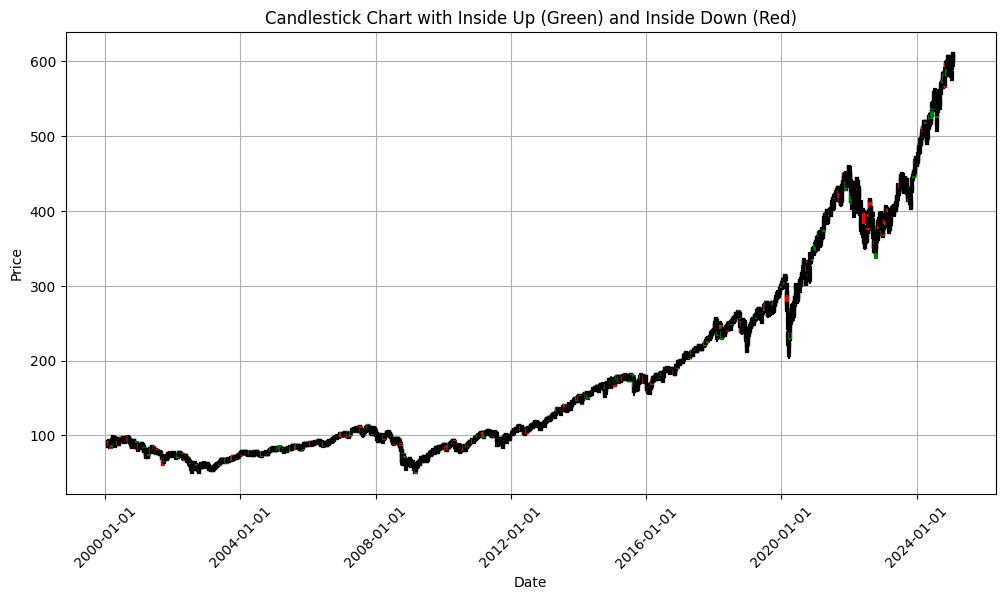

In [142]:
df_spy['Date'] = pd.to_datetime(df_spy['Unnamed: 0'])
fig, ax = plt.subplots(figsize=(12, 6))

for i in range(len(df_spy)):
    color = 'g' if df_spy.iloc[i]['inside_up'] else 'r' if df_spy.iloc[i]['inside_down'] else 'black'
    ax.plot([df_spy.iloc[i]['Date'], df_spy.iloc[i]['Date']], [
            df_spy.iloc[i]['Low'], df_spy.iloc[i]['High']], color=color)
    ax.plot([df_spy.iloc[i]['Date'], df_spy.iloc[i]['Date']], [df_spy.iloc[i]['Open'],
            df_spy.iloc[i]['Close']], color=color, linewidth=3)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Candlestick Chart with Inside Up (Green) and Inside Down (Red)')
plt.grid()
plt.show()

In [143]:
inside_day_df = df_spy[df_spy['inside_day'] == True]
inside_up_day_df = df_spy[df_spy['inside_up'] == True]
inside_down_day_df = df_spy[df_spy['inside_down'] == True]

In [144]:
avg_spy_volume = df_spy['Volume'].mean()
avg_inside_day_volume = inside_day_df['Volume'].mean()
avg_inside_up_day_volume = inside_up_day_df['Volume'].mean()
avg_inside_down_day_volume = inside_down_day_df['Volume'].mean()

print( \
f'Average Spy Volume: {avg_spy_volume}\n \
Average Inside Day Volume: {avg_inside_day_volume}\n \
Average Inside Up Day Volume: {avg_inside_up_day_volume}\n \
Average Inside Down Day Volume: {avg_inside_down_day_volume} \
')

Average Spy Volume: 106215363.92686805
 Average Inside Day Volume: 88348396.33967789
 Average Inside Up Day Volume: 92181149.76190476
 Average Inside Down Day Volume: 103146224.57627119 


In [145]:
df_spy = pd.read_csv("../Data/CleanedData.csv",
                     parse_dates=['Unnamed: 0'], index_col='Unnamed: 0')
df_spy.index.name = 'Date'

In [146]:
def calculate_patterns(df):
    # Inside Day: Current day's range is within previous day's range
    df['inside_day'] = (df['High'] < df['High'].shift(1)) & (
        df['Low'] > df['Low'].shift(1))

    # Inside Up: T-1 is inside day AND T breaks T-1 high AND T breaks T-2 high
    df['inside_up'] = (
        df['inside_day'].shift(1) &
        (df['High'] > df['High'].shift(1)) &
        (df['High'] >= df['High'].shift(2))
    )

    # Inside Down: T-1 is inside day AND T breaks T-1 low AND T breaks T-2 low
    df['inside_down'] = (
        df['inside_day'].shift(1) &
        (df['Low'] < df['Low'].shift(1)) &
        (df['Low'] <= df['Low'].shift(2))
    )

    # Future returns calculation
    df['next_day_return'] = df['Close'].pct_change().shift(-1)
    df['inside_up_return'] = df['next_day_return'].where(df['inside_up'])
    df['inside_down_return'] = df['next_day_return'].where(df['inside_down'])

    return df


df_spy = calculate_patterns(df_spy)

In [147]:
def analyze_patterns(df):
    results = {}

    # Success Rate Analysis
    for pattern in ['inside_up', 'inside_down']:
        signals = df[pattern].sum()
        returns = df[f'{pattern}_return'].dropna()
        success_rate = (returns > 0).mean(
        ) * 100 if pattern == 'inside_up' else (returns < 0).mean() * 100
        avg_return = returns.mean() * 100
        t_stat, p_value = stats.ttest_1samp(returns, 0)

        results[pattern] = {
            'Signals': signals,
            'Success Rate (%)': success_rate,
            'Avg Return (%)': avg_return,
            'T-statistic': t_stat,
            'P-value': p_value
        }

    # Volume Analysis
    vol_analysis = {
        'all_days': df['Volume'].mean(),
        'inside_days': df.loc[df['inside_day'], 'Volume'].mean(),
        'inside_up': df.loc[df['inside_up'], 'Volume'].mean(),
        'inside_down': df.loc[df['inside_down'], 'Volume'].mean()
    }

    # Compare to random days
    baseline_success = (df['next_day_return'] > 0).mean() * 100
    results['baseline'] = {
        'Success Rate (%)': baseline_success,
        'Avg Return (%)': df['next_day_return'].mean() * 100
    }

    return results, vol_analysis


results, vol_analysis = analyze_patterns(df_spy)

In [148]:
print("Pattern Analysis Results:")
for pattern, data in results.items():
    if pattern == 'baseline':
        print(f"\nBaseline (All Days):")
    else:
        print(f"\n{pattern.upper()} Results:")
    for k, v in data.items():
        print(f"{k}: {v:.4f}" if isinstance(v, float) else f"{k}: {v}")

print("\nVolume Analysis:")
for k, v in vol_analysis.items():
    print(f"{k}: {v:.2f}")

Pattern Analysis Results:

INSIDE_UP Results:
Signals: 310
Success Rate (%): 53.2258
Avg Return (%): -0.0049
T-statistic: -0.0883
P-value: 0.9297

INSIDE_DOWN Results:
Signals: 242
Success Rate (%): 47.1074
Avg Return (%): 0.0748
T-statistic: 1.0420
P-value: 0.2984

Baseline (All Days):
Success Rate (%): 54.4515
Avg Return (%): 0.0378

Volume Analysis:
all_days: 106215363.93
inside_days: 88348396.34
inside_up: 96802208.06
inside_down: 109031195.87


In [149]:
print("\nKey Insights:")
print(
    f"1. Inside Up signals show {'positive' if results['inside_up']['Avg Return (%)'] > 0 else 'negative'} forward returns")
print(
    f"2. Inside Down patterns are {'significant' if results['inside_down']['P-value'] < 0.05 else 'not significant'}")
print(
    f"3. Inside Days occur {df_spy['inside_day'].mean()*100:.2f}% of the time")
print(
    f"4. Volume during Inside Days is {vol_analysis['inside_days']/vol_analysis['all_days']:.2f}x of average")


Key Insights:
1. Inside Up signals show negative forward returns
2. Inside Down patterns are not significant
3. Inside Days occur 10.86% of the time
4. Volume during Inside Days is 0.83x of average


In [150]:
df_spy['RSI'] = ta.momentum.rsi(df_spy['Close'], 14)
df_spy['inside_up_enhanced'] = df_spy['inside_up'] & (df_spy['RSI'] < 30)
df_spy['3_day_return'] = df_spy['Close'].pct_change(3).shift(-3)
df_spy['upper_band'], df_spy['lower_band'] = ta.volatility.bollinger_hband(df_spy['Close'], 20), ta.volatility.bollinger_lband(df_spy['Close'], 20)

In [151]:
enhanced_up = df_spy[df_spy['inside_up_enhanced']]
enhanced_success_rate = (enhanced_up['3_day_return'] > 0).mean() * 100
original_success_rate = (
    df_spy['inside_up'].astype(int).sum() / len(df_spy)) * 100

print(f'''
Inside Up Performance:
- Original Success Rate: {original_success_rate:.2f}%
- Enhanced (RSI<30) Success Rate: {enhanced_success_rate:.2f}%
- Sample Size: {len(enhanced_up)} signals
''')

t_stat, p_value = stats.ttest_ind(
    df_spy.loc[df_spy['inside_up'], '3_day_return'].dropna(),
    enhanced_up['3_day_return'].dropna()
)
print(f'P-value for improvement: {p_value:.4f}')


Inside Up Performance:
- Original Success Rate: 4.93%
- Enhanced (RSI<30) Success Rate: 100.00%
- Sample Size: 1 signals

P-value for improvement: 0.0251


In [152]:
df_spy['price_position'] = (df_spy['Close'] - df_spy['lower_band']) / \
    (df_spy['upper_band'] - df_spy['lower_band'])

band_analysis = df_spy[df_spy['inside_up_enhanced']].describe()[
    'price_position']
print(f"\nPrice Position During Enhanced Signals:\n{band_analysis}")


Price Position During Enhanced Signals:
count    1.000000
mean     0.029961
std           NaN
min      0.029961
25%      0.029961
50%      0.029961
75%      0.029961
max      0.029961
Name: price_position, dtype: float64



Returns Comparison:
inside_up_enhanced     False     True 
1-Day               0.037895 -0.493792
3-Day               0.109851  3.814206


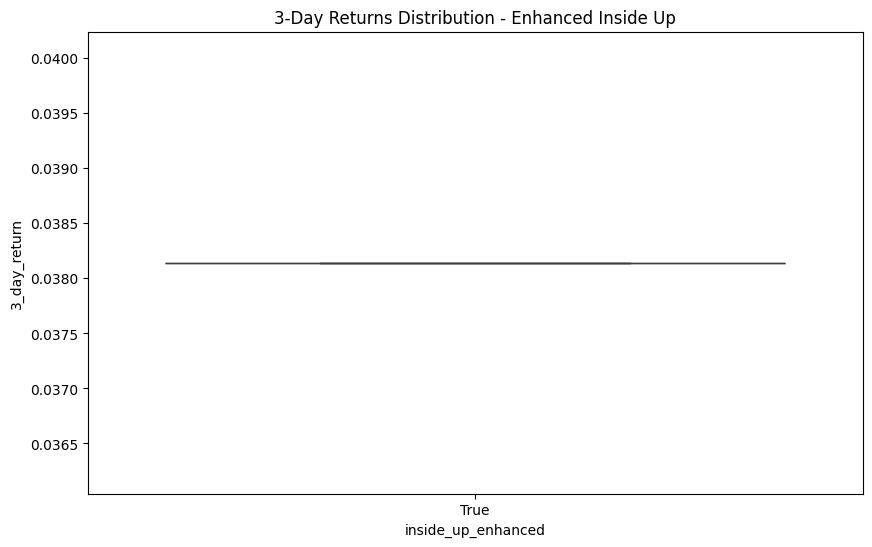

In [153]:
returns_comparison = pd.DataFrame({
    '1-Day': df_spy.groupby('inside_up_enhanced')['next_day_return'].mean(),
    '3-Day': df_spy.groupby('inside_up_enhanced')['3_day_return'].mean()
}).T * 100

print(f"\nReturns Comparison:\n{returns_comparison}")

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_spy[df_spy['inside_up_enhanced']],
            x='inside_up_enhanced', y='3_day_return')
plt.title('3-Day Returns Distribution - Enhanced Inside Up')
plt.show()

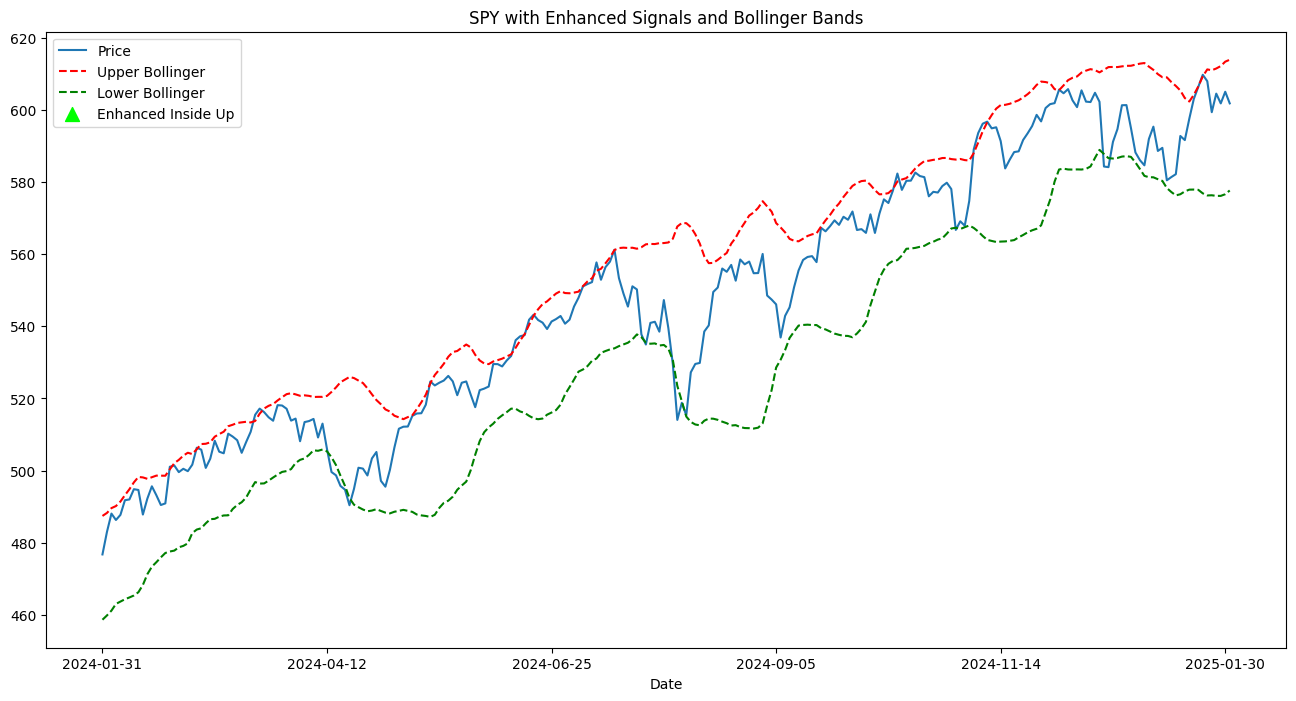

In [154]:
def plot_enhanced_signals(df):
    fig, ax = plt.subplots(figsize=(16, 8))

    df['Close'].plot(ax=ax, label='Price')
    df['upper_band'].plot(ax=ax, ls='--', color='red', label='Upper Bollinger')
    df['lower_band'].plot(ax=ax, ls='--', color='green',
                          label='Lower Bollinger')

    enhanced_points = df[df['inside_up_enhanced']]
    ax.scatter(enhanced_points.index, enhanced_points['Low'] * 0.98,
               marker='^', color='lime', s=100, label='Enhanced Inside Up')

    plt.title('SPY with Enhanced Signals and Bollinger Bands')
    plt.legend()
    plt.show()


plot_enhanced_signals(df_spy.tail(252))

In [157]:
def calculate_strategy(df):
    df['position'] = np.where(df['inside_up_enhanced'], 1, 0)
    df['strategy_returns'] = df['position'].shift(1) * df['3_day_return']
    return df

df_spy = calculate_strategy(df_spy)

cumulative_returns = (1 + df_spy[['3_day_return', 'strategy_returns']]).cumprod()

strat_return = cumulative_returns['strategy_returns'].iloc[-1] * 100
benchmark_return = cumulative_returns['3_day_return'].iloc[-1] * 100

max_drawdown = (cumulative_returns['strategy_returns'].max()
                - cumulative_returns['strategy_returns'].min())

sharpe_ratio = (df_spy['strategy_returns'].mean() /
                df_spy['strategy_returns'].std()) * np.sqrt(252/3)

print(f'''
Strategy Performance:
- Strategy Cumulative Return: {strat_return:.1f}%
- Benchmark Cumulative Return: {benchmark_return:.1f}%
- Sharpe Ratio: {sharpe_ratio:.2f}
- Max Drawdown: {max_drawdown:.2%}
''')


Strategy Performance:
- Strategy Cumulative Return: nan%
- Benchmark Cumulative Return: nan%
- Sharpe Ratio: 0.12
- Max Drawdown: 5.03%

